In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
from scipy.stats import multivariate_normal as mvn
from jax import config


import vsem_jax as vsem
from vsem_inv_prob import (
    InvProb, 
    VSEMPrior, 
    VSEMLikelihood,
    VSEMTest
)

import sys
sys.path.append("./../linear_Gaussian/")
from Gaussian import Gaussian

rng = np.random.default_rng(6435)
config.update("jax_enable_x64", True)


/opt/miniconda3/envs/modmcmc-dev/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
#
# Exact Inverse Problem
#

n_days = 365 * 2
par_names = ["kext", "av"]

# For exact MCMC
proposal_cov = np.diag([0.3**2, 0.04**2])

likelihood = VSEMLikelihood(rng, n_days, par_names)
prior = VSEMPrior(likelihood.par_names, rng)
inv_prob = InvProb(rng, prior, likelihood, proposal_cov=proposal_cov)

In [3]:
#
# Surrogate Inverse Problem
#

vsem_test = VSEMTest(inv_prob, n_design=10)

Optimization terminated successfully.
         Current function value: 40.903678
         Iterations: 74
         Function evaluations: 94
         Gradient evaluations: 94


In [ ]:
likelihood.plot_driver()
likelihood.plot_ground_truth()

In [ ]:
inv_prob.reset_sampler()
samp, trace_plot = inv_prob.sample_posterior(n_step=10000)

display(trace_plot)

In [ ]:
plt.hist2d(samp[:,0], samp[:,1], bins=30, cmap='Blues')
plt.plot(*likelihood.par_true, "*", color="red", markersize=12)
plt.colorbar(label='Counts per bin')
plt.xlabel('u1')
plt.ylabel('u2')
plt.title('Exact posterior')
plt.show()

In [4]:
fig_exact, ax_exact = vsem_test.plot_exact_log_post()
fig_gp_post, ax_gp_post = vsem_test.plot_gp_pred(conditional=True, latent_pred=True, figsize=(10,5))
fig_comparison, ax_comparison = vsem_test.plot_true_vs_gp_mean(conditional=True, latent_pred=True, figsize=(10,5))

/Users/andrewroberts/Desktop/git-repos/bip-surrogates-paper/experiments/vsem/vsem_inv_prob.py:768: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


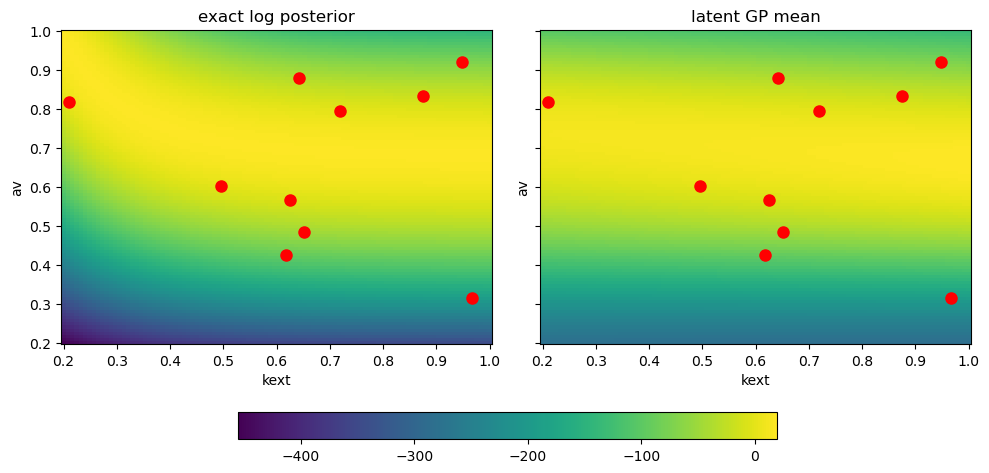

In [8]:
fig_comparison.subplots_adjust(bottom=0.3)

display(fig_comparison)

In [3]:
import numpy as np
np.concatenate([[1,2,3], [4,5,6]])

array([1, 2, 3, 4, 5, 6])